In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [18]:
# Load the dataset
data = "Iris.csv"

In [19]:
# Create a DataFrame
df = pd.read_csv(data)

In [20]:
# Display the first few rows of the dataset
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


### Data preprocessing


In [21]:
# Encode the categorical 'Species' column into numerical values
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])


In [22]:
# Split the data into features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Define a function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return accuracy, report

In [26]:
# Initialize classifiers
classifiers = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}


In [27]:
# Train and evaluate each classifier
results = {}
for name, classifier in classifiers.items():
    accuracy, report = train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test)
    results[name] = {'Accuracy': accuracy, 'Classification Report': report}

In [28]:
# Display the results
for name, result in results.items():
    print(f"\n{name} Classifier:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("Classification Report:\n", result['Classification Report'])


Decision Tree Classifier:
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Random Forest Classifier:
Accuracy: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Support Vector Machine Classifier:
Accuracy: 1.0000
Classification Report:
               precision  

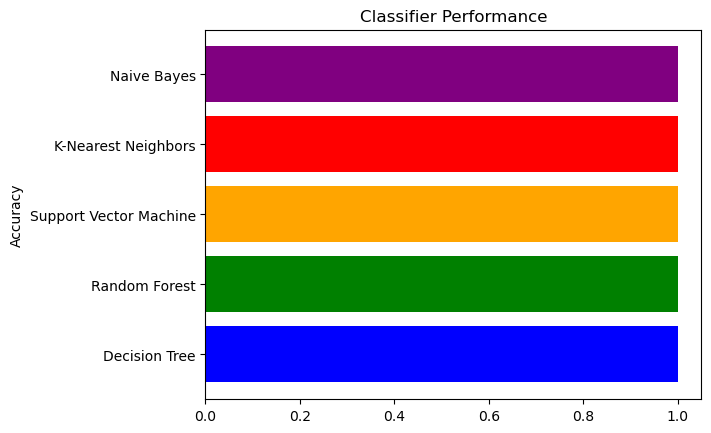

In [29]:
# Plot the results
names = list(results.keys())
accuracies = [result['Accuracy'] for result in results.values()]

plt.barh(names, accuracies, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.ylabel('Accuracy')
plt.title('Classifier Performance')
plt.show()